In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
print("Tensorflow version:", tf.__version__)


Tensorflow version: 2.6.0


In [ ]:
#This is from the .jpg images already in folders 48X48

In [ ]:
# check for GPU connection
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Tensorflow version 2.6.0
Found GPU at: /device:GPU:0


### Upload the data from a ziped folder to google colab, and unzip with the below code. The folders contain jpg images 48X48 size

In [1]:
!unzip fer2013_2.zip -d my_data

Streaming output truncated to the last 5000 lines.
 extracting: my_data/fer2013_2/train/sad/Training_65267116.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_65275626.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_6529266.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_65329617.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_65338712.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_65338797.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_65387162.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_65404494.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_65426218.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_65430136.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_65437377.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_6545735.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_65463385.jpg  
 extracting: my_data/fer2013_2/train/sad/Training_65473985.jpg  
 extracting: my_data/fer2013_2/train/sad/

### Process the images from folders using ImageDataGenerator. This determines the categories based on the folder names

In [4]:
img_size = 48
batch_size= 64
#Tried the first time with out flipping

datagen_train = ImageDataGenerator()
#datagen_train = ImageDataGenerator(horizontal_flip =True) #data augmentation flip images randomly
#on horizontal axis
train_generator = datagen_train.flow_from_directory("/content/my_data/fer2013_2/train", 
                                                   target_size = (img_size, img_size),#images will be resized if not 48X48
                                                   color_mode='grayscale',
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle=True)

    
datagen_validation = ImageDataGenerator()
#datagen_validation = ImageDataGenerator(horizontal_flip =True) #data augmentation flip images randomly
#on horizontal axis
validation_generator = datagen_validation.flow_from_directory("/content/my_data/fer2013_2/test", 
                                                   target_size = (img_size, img_size),#images will be resized if not 48X48
                                                   color_mode='grayscale',
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle=True)  

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Build the model

In [7]:
model = Sequential()


model.add(Conv2D(filters=64,kernel_size=(3, 3),activation='relu',input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

#second conv
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5)) 

#3rd conv
#model.add(Conv2D(filters=512, (3,3), padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 


#conv layer
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.5)) 

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.5)) 

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.5)) 

model.add(Dense(7, activation='softmax'))


opt = Adam(lr=0.0005)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['Accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_7 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
batch_normalization_8 (Batch (None, 21, 21, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:

history = model.fit(x=train_generator, epochs=30, validation_data=validation_generator, verbose=1
)

Epoch 1/30
449/449 [==============================] - 24s 48ms/step - loss: 2.4454 - Accuracy: 0.1913 - val_loss: 2.0252 - val_Accuracy: 0.2572
Epoch 2/30
449/449 [==============================] - 21s 47ms/step - loss: 2.0082 - Accuracy: 0.2253 - val_loss: 1.7835 - val_Accuracy: 0.2633
Epoch 3/30
449/449 [==============================] - 21s 47ms/step - loss: 1.8224 - Accuracy: 0.2720 - val_loss: 1.6727 - val_Accuracy: 0.3293
Epoch 4/30
449/449 [==============================] - 21s 47ms/step - loss: 1.6847 - Accuracy: 0.3368 - val_loss: 1.5703 - val_Accuracy: 0.3869
Epoch 5/30
449/449 [==============================] - 21s 47ms/step - loss: 1.5568 - Accuracy: 0.3929 - val_loss: 1.4792 - val_Accuracy: 0.4270
Epoch 6/30
449/449 [==============================] - 21s 47ms/step - loss: 1.4807 - Accuracy: 0.4246 - val_loss: 1.4072 - val_Accuracy: 0.4422
Epoch 7/30
449/449 [==============================] - 21s 47ms/step - loss: 1.4097 - Accuracy: 0.4541 - val_loss: 1.3950 - val_Accuracy:

### Plot the Loss

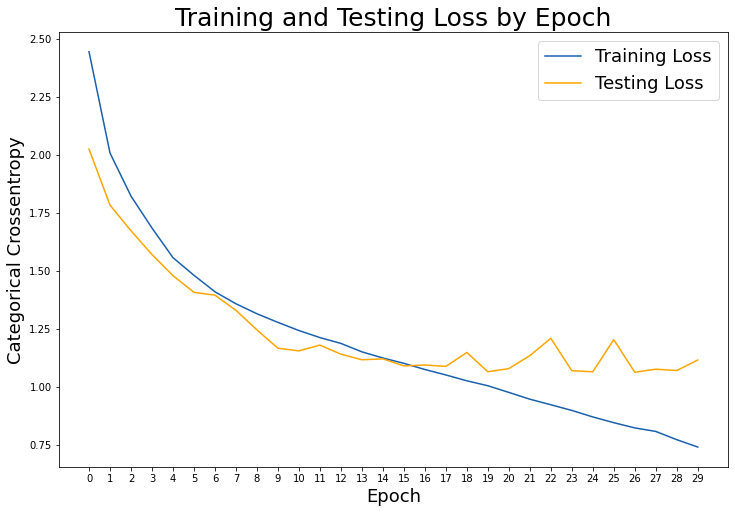

In [9]:

train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch
# Set figure size.
plt.figure(figsize=(12, 8))


plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

### Plot the Accuracy

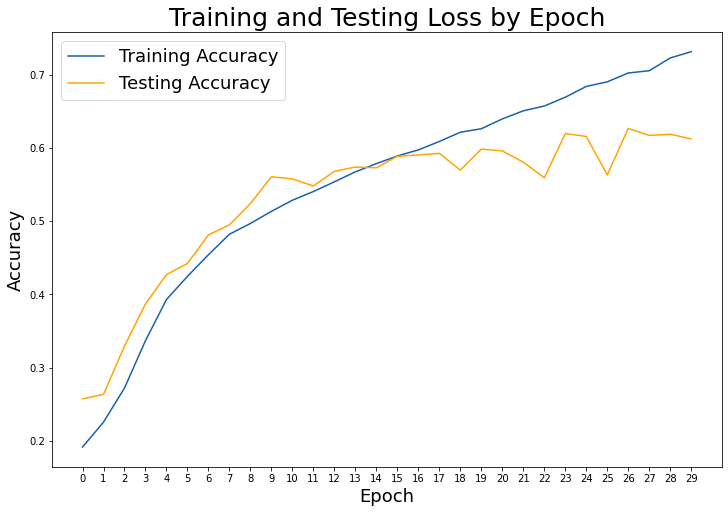

In [10]:

train_acc = history.history['Accuracy']
test_acc = history.history['val_Accuracy']
epoch_labels = history.epoch

plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='#185fad')
plt.plot(test_acc, label='Testing Accuracy', color='orange')

plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels
plt.legend(fontsize=18);

### Generate a Confusion Matrix to evaluate predictions

In [11]:
#predictions
#Next 3 cells used parts of code from
# https://medium.com/analytics-vidhya/how-to-create-a-confusion-matrix-with-the-test-result-in-your-training-model-802b1315d8ee
y_test = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

In [12]:
targets = []
for key in train_generator.class_indices:
  targets.append(key)

In [13]:
def plot_conmatrix(y_test, y_pred, columns, size = (20,14)):
    
    cm = confusion_matrix(y_test, y_pred) 
    cm_df = pd.DataFrame(cm,
    index = [col for col in columns], 
    columns = [col for col in columns])
    plt.figure(figsize=(18,16))

    sns.heatmap(cm_df, annot = True, cmap = "Blues", fmt='g', linewidths=.2)
    plt.title('Emotion Detection Confusion Matrix', fontsize = 25)
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label', fontsize = 20)
    plt.tick_params(axis='both', labelsize=16)
    plt.show()

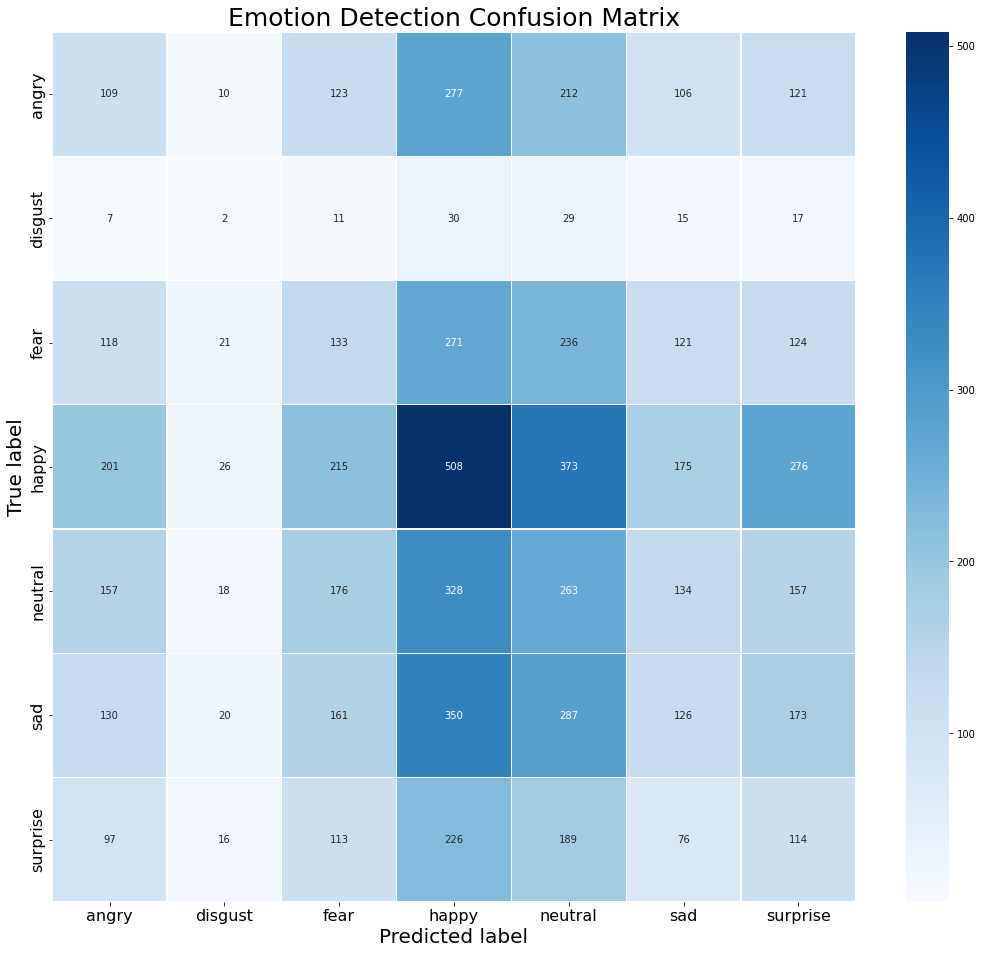

In [14]:

plot_conmatrix(y_test, y_pred, targets)

### Save the model

In [ ]:
#Write to saved model out as a json

model_json = model.to_json()
with open("/content/my_data/model-2.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model-2-w.h5")

In [ ]:
#write the model using tensor flow.
!mkdir -p saved_model
model.save('saved_model/model-f')
#model.save('/content/my_data/model-f')

INFO:tensorflow:Assets written to: saved_model/model-f/assets
